In [1]:
import time
import os
import shutil
import sys
import h5py
import tensorflow                             as tf
import numpy                                  as np
import seaborn                                as sns
import pandas                                 as pd
import numpy.random                           as random
from sklearn.utils                        import shuffle
from sklearn.model_selection              import train_test_split
from tqdm                                 import tqdm
from os                                   import path
import pysftp                                 as sftp
import random                                 as rnd
import math

LocalFlg         = 'False'
if (not LocalFlg):
    WORKSPACE_PATH = "/home/venturi/WORKSPACE/"
    IP             = '128.174.245.172'
    User           = "venturi"
else:
    WORKSPACE_PATH = os.getenv('WORKSPACE_PATH')  
    
import matplotlib as mpl
import matplotlib.pyplot                      as plt
plt.style.use(WORKSPACE_PATH+'/SurQCT/surqct/scripts/postprocessing/presentation.mplstyle')

print("="*50)
print(" TensorFlow version: {}".format(tf.__version__))
print(" Eager execution: {}".format(tf.executing_eagerly()))

 TensorFlow version: 2.4.1
 Eager execution: True


In [2]:
WORKSPACE_PATH      = os.environ['WORKSPACE_PATH']
SurQCTFldr          = WORKSPACE_PATH + '/SurQCT_MAITH/surqct/'

RatesType           = 'KExcit'
ExcitType           = 'KInel'
NNRunIdx            = 9
# ExcitType           = 'KExch'
# NNRunIdx            = 7

PathToRunFld        = SurQCTFldr + '/../' + RatesType + '/all_temperatures_nondim/' + ExcitType + '/' 
# PathToRunFld        = SurQCTFldr + '/../' + RatesType + '_N3_TransLearn/all_temperatures_nondim/' + ExcitType + '/' 


TTranVec            = [5000.0]

MinRate             = 1.e-15
CPlotFlf            = False

iIdxVec             = np.array([1, 10, 34, 35, 81, 83, 98, 1000, 2000, 3000, 4580, 4581, 5000, 6000, 7432, 10000], dtype=int)
# iIdxVec             = np.array([774], dtype=int)

In [3]:
#======================================================================
print("\n[SurQCT]: Loading Modules and Functions ...")

sys.path.insert(0, SurQCTFldr  + '/src/Reading/')
from Reading  import read_levelsdata, read_diatdata

InputFld = PathToRunFld + '/Run_' + str(NNRunIdx) + '/'
print(InputFld)
sys.path.insert(0, InputFld)
#======================================================================


[SurQCT]: Loading Modules and Functions ...
/home/venturi/WORKSPACE//SurQCT_MAITH/surqct//../KExcit/all_temperatures_nondim/KInel//Run_9/


In [4]:
#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For N2
# InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5'
# InputData.Molecules       = ['N2','N2'] 
# InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_GroundState_log_nd.csv',
#                              InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_GroundState_log_nd.csv']
# InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp',
#                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp']   

# InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/N2O_UMN.hdf5'
# InputData.Molecules       = ['N2','N2'] 
# InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_UMN_ForN2O2_Bottom_Vib_we_nd.csv',
#                              InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_UMN_ForN2O2_Bottom_Vib_we_nd.csv']
# InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/UMN_ForN2O2/Recomputed.inp',
#                              InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/UMN_ForN2O2/Recomputed.inp'] 

# # # For NO 
# # InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/NON_UMN.hdf5'
# # InputData.Molecules       = ['NO','NO'] 
# # InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/NO_UMN_Bottom_Vib_we_nd.csv',
# #                              InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/NO_UMN_Bottom_Vib_we_nd.csv']
# # InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/NO/UMN/Recomputed.inp',
# #                              InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/NO/UMN/Recomputed.inp'] 
# # ScalingFactor = 1.0 #9.545/10.667

# # # For O2 from COO PES
# # InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/O2C_NASA.hdf5'
# # InputData.Molecules       = ['O2','O2'] 
# # InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/O2_NASA_log_nd.csv',
# #                              InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/O2_NASA_log_nd.csv']
# # InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/O2/NASA/O2_levels_venturi_new.dat',
# #                              InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/O2/NASA/O2_levels_venturi_new.dat']
# # ScalingFactor = 1.0 #8.727/10.667

# # # For CO from COO PES
# InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/CO2_NASA.hdf5'
# InputData.Molecules       = ['CO','CO'] 
# InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Diss_log_nd.csv',
#                              InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Diss_log_nd.csv']
# InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat',
#                              InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat']
# ScalingFactor = 1.0

# # # For CO from COO PES
# InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/CO2_NASA.hdf5'
# InputData.Molecules       = ['CO','O2'] 
# InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Diss_log_nd_CORefForHeteroExch.csv',
#                              InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/O2_NASA_Diss_log_nd_CORefForHeteroExch.csv']
# InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat',
#                              InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/O2/NASA/O2_levels_venturi_new.dat']
ScalingFactor = 1.0





[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...


In [5]:
#=====================================================================================
print("\n[SurQCT]: Loading Final Modules ... ")

sys.path.insert(0, SurQCTFldr  + '/src/Model/' + InputData.ApproxModel + '/')
from Model import model


InputData.DefineModelIntFlg  = 0
InputData.TrainIntFlg        = 0
InputData.TransferFlg        = False
NN_KExcit                    = model(InputData, InputData.PathToRunFld, None, None)
NN_KExcit.load_params(InputData.PathToParamsFld)
#=====================================================================================


[SurQCT]: Loading Final Modules ... 
[SurQCT]:   Variables Selected for Training:
[SurQCT]:     x =  ['log_EVib_i', 'log_ERot_i', 'ri_i', 'log_rorMin_i', 'TTran_i', 'log_EVib_Delta', 'log_ERot_Delta', 'ri_Delta', 'log_rorMin_Delta', 'TTran_Delta']
[SurQCT]:     y =  KExcit
[SurQCT]:   Loading ML Model from Folder: /home/venturi/WORKSPACE//SurQCT_MAITH/surqct//../KExcit/all_temperatures_nondim/KInel//Run_9/MyModel
[SurQCT]:   Restoring ML Model Weigths to File: /home/venturi/WORKSPACE//SurQCT_MAITH/surqct//../KExcit/all_temperatures_nondim/KInel//Run_9/MyModel/MyWeights.h5
[SurQCT]:   Loading ML Model Parameters from File:  /home/venturi/WORKSPACE//SurQCT_MAITH/surqct//../KExcit/all_temperatures_nondim/KInel//Run_9/Params//ModelCheckpoint/cp-1963.ckpt


In [6]:
#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)

[SurQCT]:   Reading Variables:  ['jqn', 'vqn', 'log_rorMin', 'log_ERot', 'ri', 'log_EVib']


In [7]:
#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)

[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/O2_UMN_log_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/O2_UMN_log_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp


In [8]:
#=======================================================================================================================================
# Reading Excitation Rates Data 
def read_kexcitdata(InputData, PathToHDF5File, TTra, TInt, NProcTypes):
    print('[SurQCT]:       Reading HDF5 File from: ' + PathToHDF5File + ' for Excitation Rates at Temperature ' + str(int(TTra)) + 'K')

    HDF5Exist_Flg = path.exists(PathToHDF5File)
    if (HDF5Exist_Flg):
        f = h5py.File(PathToHDF5File, 'a')
    else:
        f = {'key': 'value'}

    TStr = 'T_' + str(int(TTra)) + '_' + str(int(TInt)) + '/Rates/'
    grp  = f[TStr]

    Data  = grp["Inel"]
    KInel = Data[...]

    KOther = []
    for iProc in range(2, NProcTypes):
        ExchStr    = "Exch_" + str(iProc-1)
        Data       = grp[ExchStr] 
        KOtherTemp = Data[...]
        KOther.append(KOtherTemp)

    f.close()   


    return KInel, KOther
#=======================================================================================================================================

# All Molecules Plot on same figure

[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 0; vqn: 0; jqn:0


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]



[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...
[SurQCT]:   Reading Variables:  ['log_rorMin', 'log_ERot', 'log_EVib', 'VMax', 'ri', 'jqn', 'vqn']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 0; vqn: 0; jqn:0


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]



[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...
[SurQCT]:   Reading Variables:  ['log_rorMin', 'log_ERot', 'log_EVib', 'VMax', 'ri', 'jqn', 'vqn']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 0; vqn: 0; jqn:0


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


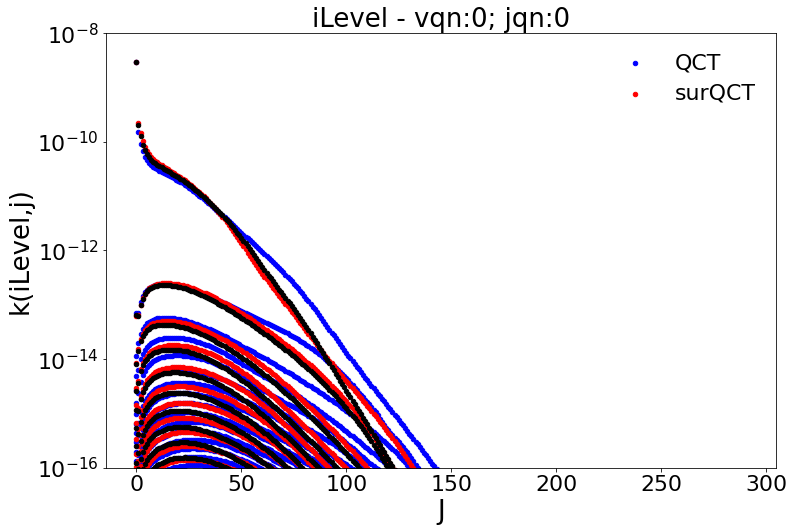

In [36]:
iIdxVec             = np.array([1], dtype=int)
fig = plt.figure(figsize=(12,8))


InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)
    
for TTran in TTranVec:
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit = KInelMat
    elif (ExcitType == 'KExch'):
        KExcit = KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    Str = 'q_'+str(int(TTran))
    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        if (InputData.ExoEndoFlg):
            jIdxVec           = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] <= DiatData[0]['EInt'].to_numpy()[iIdx])]
            jIdxVecNo         = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] > DiatData[0]['EInt'].to_numpy()[iIdx])]
            RatioNo           = [DiatData[0][Str].to_numpy()[iIdx]/DiatData[1][Str].to_numpy()[jIdx] for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] > DiatData[0]['EInt'].to_numpy()[iIdx])]
        else:
            jIdxVec           = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    >= DiatData[0][Str].to_numpy()[iIdx])]
            jIdxVecNo         = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    < DiatData[0][Str].to_numpy()[iIdx])]
            RatioNo           = [DiatData[0][Str].to_numpy()[iIdx]/DiatData[1][Str].to_numpy()[jIdx] for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    < DiatData[0][Str].to_numpy()[iIdx])]
        jNLevels              = len(jIdxVec)
        jNLevelsNo            = len(jIdxVecNo)  


        ### FWD Rates
        iiIdxVec              = [iIdx]*jNLevels

        TTranVecTemp          = np.ones((jNLevels))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = jIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = jIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp
        jLevelsDataTemp.index = jIdxVec

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = jIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTemp_FWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_FWD          = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 
            KExcit_NN_FWD1         = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact * ScalingFactor 



        ## BWD Rates
        iiIdxVec              = jIdxVecNo
        jIdxVec               = [iIdx]*jNLevelsNo

        TTranVecTemp          = np.ones((jNLevelsNo))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = iiIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = iiIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy() 
        jLevelsDataTemp.index = iiIdxVec
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = iiIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTempp_BWD            = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTempp_BWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_BWD          = np.exp( NN_KExcit.Model.predict(xTempp_BWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 
            KExcit_NN_BWD[:,0]     = KExcit_NN_BWD[:,0] / RatioNo
            KExcit_NN_BWD1          = np.exp( NN_KExcit.Model.predict(xTempp_BWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact * ScalingFactor
            KExcit_NN_BWD1[:,0]     = KExcit_NN_BWD1[:,0] / RatioNo


            iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
            iLevelsData.columns   = [(VarName + '_j') for VarName in iLevelsData.columns]

            jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
            jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

            kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
            kLevelsData.columns   = [(VarName + '_i') for VarName in kLevelsData.columns]

            xTemp_BWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)



        ### Concatenating
            if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
                xTemp     = pd.concat([xTemp_FWD, xTemp_BWD], axis=0)
                KExcit_NN = np.concatenate((KExcit_NN_FWD, KExcit_NN_BWD), axis=0)
                KExcit_NN1 = np.concatenate((KExcit_NN_FWD1, KExcit_NN_BWD1), axis=0)
            else:
                xTemp     = xTemp_BWD
                KExcit_NN = KExcit_NN_BWD
                KExcit_NN1 = KExcit_NN_BWD1
        else:
            if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
                xTemp     = xTemp_FWD
                KExcit_NN = KExcit_NN_FWD
                KExcit_NN1 = KExcit_NN_FWD1


        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        if (CPlotFlf):

            vmax     = -8
            vmin     = -14

            cdict = {
              'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
              'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
              'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
            }

            fig, axs = plt.subplots(1,2,figsize=(15,15))

            axs[0].scatter(DiatData[1]['vqn'][Mask], DiatData[1]['jqn'][Mask], c=np.log10(KExcit[iIdx,Mask]), vmin=vmin, vmax=vmax)
            axs[0].set_xlim([DiatData[1]['vqn'].min(), DiatData[1]['vqn'].max()])
            axs[0].set_ylim([DiatData[1]['jqn'].min(), DiatData[1]['jqn'].max()])

            axs[1].scatter(xTemp['vqn_j'], xTemp['jqn_j'], c=np.log10(KExcit_NN[:,0]), vmin=vmin, vmax=vmax)
            axs[1].set_xlim([DiatData[1]['vqn'].min(), DiatData[1]['vqn'].max()])
            axs[1].set_ylim([DiatData[1]['jqn'].min(), DiatData[1]['jqn'].max()])

            ax=plt.gca()
            PCM=ax.get_children()[2] #get the mappable, the 1st and the 2nd are the x and y axes
            #plt.colorbar(PCM, ax=ax) 

        else:

            j_color = xTemp['jqn_j'] % 2
            v_color = xTemp['vqn_j'] == 0
            cmap=mpl.colors.ListedColormap(["navy","crimson","limegreen","gold","k","r","b","y","c"])
            cmap1=mpl.colors.ListedColormap(["r","limegreen"])

            label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
            #plt.scatter(DiatData[1]['jqn'][Mask], KExcit[iIdx,Mask], c='k', s=30,label='QCT')
            #plt.scatter(xTemp['jqn_j'], KExcit_NN[:,0], s=20, c='r', label='surQCT')
            #plt.scatter(xTemp['jqn_j'], KExcit_NN[:,0], s=20, c='r', label='surQCT')
            plt.scatter(xTemp['jqn_j'], KExcit_NN1[:,0], s=20,  c='b', label='surQCT')
            plt.yscale('log')
            plt.legend(['QCT','surQCT'],frameon=False)
            plt.ylim([1.e-16, 1.e-8])
            plt.xlabel('J')
            plt.ylabel('k(iLevel,j)')
            plt.title(label_plot)
            
            
#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For CO from COO PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/CO2_NASA.hdf5'
InputData.Molecules       = ['CO','CO'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat',
                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat']
ScalingFactor = 1.0

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)


for TTran in TTranVec:
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit = KInelMat
    elif (ExcitType == 'KExch'):
        KExcit = KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    Str = 'q_'+str(int(TTran))
    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        if (InputData.ExoEndoFlg):
            jIdxVec           = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] <= DiatData[0]['EInt'].to_numpy()[iIdx])]
            jIdxVecNo         = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] > DiatData[0]['EInt'].to_numpy()[iIdx])]
            RatioNo           = [DiatData[0][Str].to_numpy()[iIdx]/DiatData[1][Str].to_numpy()[jIdx] for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] > DiatData[0]['EInt'].to_numpy()[iIdx])]
        else:
            jIdxVec           = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    >= DiatData[0][Str].to_numpy()[iIdx])]
            jIdxVecNo         = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    < DiatData[0][Str].to_numpy()[iIdx])]
            RatioNo           = [DiatData[0][Str].to_numpy()[iIdx]/DiatData[1][Str].to_numpy()[jIdx] for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    < DiatData[0][Str].to_numpy()[iIdx])]
        jNLevels              = len(jIdxVec)
        jNLevelsNo            = len(jIdxVecNo)  


        ### FWD Rates
        iiIdxVec              = [iIdx]*jNLevels

        TTranVecTemp          = np.ones((jNLevels))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = jIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = jIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp
        jLevelsDataTemp.index = jIdxVec

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = jIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTemp_FWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_FWD          = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 
            KExcit_NN_FWD1         = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact * ScalingFactor 



        ## BWD Rates
        iiIdxVec              = jIdxVecNo
        jIdxVec               = [iIdx]*jNLevelsNo

        TTranVecTemp          = np.ones((jNLevelsNo))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = iiIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = iiIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy() 
        jLevelsDataTemp.index = iiIdxVec
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = iiIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTempp_BWD            = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTempp_BWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_BWD          = np.exp( NN_KExcit.Model.predict(xTempp_BWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 
            KExcit_NN_BWD[:,0]     = KExcit_NN_BWD[:,0] / RatioNo
            KExcit_NN_BWD1          = np.exp( NN_KExcit.Model.predict(xTempp_BWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact * ScalingFactor
            KExcit_NN_BWD1[:,0]     = KExcit_NN_BWD1[:,0] / RatioNo


            iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
            iLevelsData.columns   = [(VarName + '_j') for VarName in iLevelsData.columns]

            jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
            jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

            kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
            kLevelsData.columns   = [(VarName + '_i') for VarName in kLevelsData.columns]

            xTemp_BWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)



        ### Concatenating
            if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
                xTemp     = pd.concat([xTemp_FWD, xTemp_BWD], axis=0)
                KExcit_NN = np.concatenate((KExcit_NN_FWD, KExcit_NN_BWD), axis=0)
                KExcit_NN1 = np.concatenate((KExcit_NN_FWD1, KExcit_NN_BWD1), axis=0)
            else:
                xTemp     = xTemp_BWD
                KExcit_NN = KExcit_NN_BWD
                KExcit_NN1 = KExcit_NN_BWD1
        else:
            if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
                xTemp     = xTemp_FWD
                KExcit_NN = KExcit_NN_FWD
                KExcit_NN1 = KExcit_NN_FWD1


        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        if (CPlotFlf):

            vmax     = -8
            vmin     = -14

            cdict = {
              'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
              'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
              'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
            }

            fig, axs = plt.subplots(1,2,figsize=(15,15))

            axs[0].scatter(DiatData[1]['vqn'][Mask], DiatData[1]['jqn'][Mask], c=np.log10(KExcit[iIdx,Mask]), vmin=vmin, vmax=vmax)
            axs[0].set_xlim([DiatData[1]['vqn'].min(), DiatData[1]['vqn'].max()])
            axs[0].set_ylim([DiatData[1]['jqn'].min(), DiatData[1]['jqn'].max()])

            axs[1].scatter(xTemp['vqn_j'], xTemp['jqn_j'], c=np.log10(KExcit_NN[:,0]), vmin=vmin, vmax=vmax)
            axs[1].set_xlim([DiatData[1]['vqn'].min(), DiatData[1]['vqn'].max()])
            axs[1].set_ylim([DiatData[1]['jqn'].min(), DiatData[1]['jqn'].max()])

            ax=plt.gca()
            PCM=ax.get_children()[2] #get the mappable, the 1st and the 2nd are the x and y axes
            #plt.colorbar(PCM, ax=ax) 

        else:

            j_color = xTemp['jqn_j'] % 2
            v_color = xTemp['vqn_j'] == 0
            cmap=mpl.colors.ListedColormap(["navy","crimson","limegreen","gold","k","r","b","y","c"])
            cmap1=mpl.colors.ListedColormap(["r","limegreen"])

            label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
            #plt.scatter(DiatData[1]['jqn'][Mask], KExcit[iIdx,Mask], c='k', s=30,label='QCT')
            #plt.scatter(xTemp['jqn_j'], KExcit_NN[:,0], s=20, c='r', label='surQCT')
            #plt.scatter(xTemp['jqn_j'], KExcit_NN[:,0], s=20, c='r', label='surQCT')
            plt.scatter(xTemp['jqn_j'], KExcit_NN1[:,0], s=20, c='r', label='surQCT')
            plt.yscale('log')
            plt.legend(['QCT','surQCT'],frameon=False)
            plt.ylim([1.e-16, 1.e-8])
            plt.xlabel('J')
            plt.ylabel('k(iLevel,j)')
            plt.title(label_plot)
            
#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For N2 from N3 PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5'
InputData.Molecules       = ['N2','N2'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp',
                            InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp']   

ScalingFactor = 1.0

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)

iIdxVec             = np.array([1], dtype=int)
TTranVecNew = [5000.0]

for TTran in TTranVecNew:
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit = KInelMat
    elif (ExcitType == 'KExch'):
        KExcit = KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    Str = 'q_'+str(int(TTran))
    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        if (InputData.ExoEndoFlg):
            jIdxVec           = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] <= DiatData[0]['EInt'].to_numpy()[iIdx])]
            jIdxVecNo         = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] > DiatData[0]['EInt'].to_numpy()[iIdx])]
            RatioNo           = [DiatData[0][Str].to_numpy()[iIdx]/DiatData[1][Str].to_numpy()[jIdx] for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] > DiatData[0]['EInt'].to_numpy()[iIdx])]
        else:
            jIdxVec           = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    >= DiatData[0][Str].to_numpy()[iIdx])]
            jIdxVecNo         = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    < DiatData[0][Str].to_numpy()[iIdx])]
            RatioNo           = [DiatData[0][Str].to_numpy()[iIdx]/DiatData[1][Str].to_numpy()[jIdx] for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    < DiatData[0][Str].to_numpy()[iIdx])]
        jNLevels              = len(jIdxVec)
        jNLevelsNo            = len(jIdxVecNo)  


        ### FWD Rates
        iiIdxVec              = [iIdx]*jNLevels

        TTranVecTemp          = np.ones((jNLevels))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = jIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = jIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp
        jLevelsDataTemp.index = jIdxVec

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = jIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTemp_FWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_FWD          = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 
            KExcit_NN_FWD1         = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact * ScalingFactor 



        ## BWD Rates
        iiIdxVec              = jIdxVecNo
        jIdxVec               = [iIdx]*jNLevelsNo

        TTranVecTemp          = np.ones((jNLevelsNo))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = iiIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = iiIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy() 
        jLevelsDataTemp.index = iiIdxVec
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = iiIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTempp_BWD            = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTempp_BWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_BWD          = np.exp( NN_KExcit.Model.predict(xTempp_BWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 
            KExcit_NN_BWD[:,0]     = KExcit_NN_BWD[:,0] / RatioNo
            KExcit_NN_BWD1          = np.exp( NN_KExcit.Model.predict(xTempp_BWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact * ScalingFactor
            KExcit_NN_BWD1[:,0]     = KExcit_NN_BWD1[:,0] / RatioNo


            iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
            iLevelsData.columns   = [(VarName + '_j') for VarName in iLevelsData.columns]

            jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
            jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

            kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
            kLevelsData.columns   = [(VarName + '_i') for VarName in kLevelsData.columns]

            xTemp_BWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)



        ### Concatenating
            if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
                xTemp     = pd.concat([xTemp_FWD, xTemp_BWD], axis=0)
                KExcit_NN = np.concatenate((KExcit_NN_FWD, KExcit_NN_BWD), axis=0)
                KExcit_NN1 = np.concatenate((KExcit_NN_FWD1, KExcit_NN_BWD1), axis=0)
            else:
                xTemp     = xTemp_BWD
                KExcit_NN = KExcit_NN_BWD
                KExcit_NN1 = KExcit_NN_BWD1
        else:
            if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
                xTemp     = xTemp_FWD
                KExcit_NN = KExcit_NN_FWD
                KExcit_NN1 = KExcit_NN_FWD1


        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        if (CPlotFlf):

            vmax     = -8
            vmin     = -14

            cdict = {
              'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
              'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
              'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
            }

            fig, axs = plt.subplots(1,2,figsize=(15,15))

            axs[0].scatter(DiatData[1]['vqn'][Mask], DiatData[1]['jqn'][Mask], c=np.log10(KExcit[iIdx,Mask]), vmin=vmin, vmax=vmax)
            axs[0].set_xlim([DiatData[1]['vqn'].min(), DiatData[1]['vqn'].max()])
            axs[0].set_ylim([DiatData[1]['jqn'].min(), DiatData[1]['jqn'].max()])

            axs[1].scatter(xTemp['vqn_j'], xTemp['jqn_j'], c=np.log10(KExcit_NN[:,0]), vmin=vmin, vmax=vmax)
            axs[1].set_xlim([DiatData[1]['vqn'].min(), DiatData[1]['vqn'].max()])
            axs[1].set_ylim([DiatData[1]['jqn'].min(), DiatData[1]['jqn'].max()])

            ax=plt.gca()
            PCM=ax.get_children()[2] #get the mappable, the 1st and the 2nd are the x and y axes
            #plt.colorbar(PCM, ax=ax) 

        else:

            j_color = xTemp['jqn_j'] % 2
            v_color = xTemp['vqn_j'] == 0
            cmap=mpl.colors.ListedColormap(["navy","crimson","limegreen","gold","k","r","b","y","c"])
            cmap1=mpl.colors.ListedColormap(["r","limegreen"])

            label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
            #plt.scatter(DiatData[1]['jqn'][Mask], KExcit[iIdx,Mask], c='k', s=30,label='QCT')
            #plt.scatter(xTemp['jqn_j'], KExcit_NN[:,0], s=20, c='r', label='surQCT')
            #plt.scatter(xTemp['jqn_j'], KExcit_NN[:,0], s=20, c='r', label='surQCT')
            plt.scatter(xTemp['jqn_j'], KExcit_NN1[:,0], s=20, c='k', label='surQCT')
            plt.yscale('log')
            plt.legend(['QCT','surQCT'],frameon=False)
            plt.ylim([1.e-16, 1.e-8])
            plt.xlabel('J')
            plt.ylabel('k(iLevel,j)')
            plt.title(label_plot)

# CO Temperature Dependence

In [22]:
#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For CO from COO PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/CO2_NASA.hdf5'
InputData.Molecules       = ['CO','CO'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat',
                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat']
ScalingFactor = 1.0

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)



[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...
[SurQCT]:   Reading Variables:  ['VMax', 'jqn', 'vqn', 'ri', 'log_ERot', 'log_rorMin', 'log_EVib']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat


[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 2500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 0; vqn: 0; jqn:0


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 0; vqn: 0; jqn:0


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 0; vqn: 0; jqn:0


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


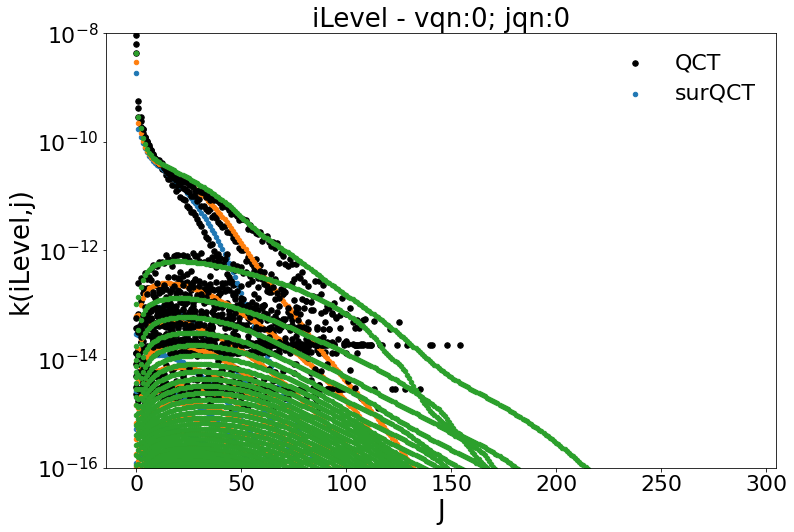

In [23]:
iIdxVec             = np.array([1], dtype=int)
fig = plt.figure(figsize=(12,8))
for TTran in TTranVec:
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit = KInelMat
    elif (ExcitType == 'KExch'):
        KExcit = KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    Str = 'q_'+str(int(TTran))
    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        if (InputData.ExoEndoFlg):
            jIdxVec           = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] <= DiatData[0]['EInt'].to_numpy()[iIdx])]
            jIdxVecNo         = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] > DiatData[0]['EInt'].to_numpy()[iIdx])]
            RatioNo           = [DiatData[0][Str].to_numpy()[iIdx]/DiatData[1][Str].to_numpy()[jIdx] for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] > DiatData[0]['EInt'].to_numpy()[iIdx])]
        else:
            jIdxVec           = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    >= DiatData[0][Str].to_numpy()[iIdx])]
            jIdxVecNo         = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    < DiatData[0][Str].to_numpy()[iIdx])]
            RatioNo           = [DiatData[0][Str].to_numpy()[iIdx]/DiatData[1][Str].to_numpy()[jIdx] for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    < DiatData[0][Str].to_numpy()[iIdx])]
        jNLevels              = len(jIdxVec)
        jNLevelsNo            = len(jIdxVecNo)  


        ### FWD Rates
        iiIdxVec              = [iIdx]*jNLevels

        TTranVecTemp          = np.ones((jNLevels))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = jIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = jIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp
        jLevelsDataTemp.index = jIdxVec

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = jIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTemp_FWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_FWD          = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 
            KExcit_NN_FWD1         = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact * ScalingFactor 



        ## BWD Rates
        iiIdxVec              = jIdxVecNo
        jIdxVec               = [iIdx]*jNLevelsNo

        TTranVecTemp          = np.ones((jNLevelsNo))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = iiIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = iiIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy() 
        jLevelsDataTemp.index = iiIdxVec
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = iiIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTempp_BWD            = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTempp_BWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_BWD          = np.exp( NN_KExcit.Model.predict(xTempp_BWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 
            KExcit_NN_BWD[:,0]     = KExcit_NN_BWD[:,0] / RatioNo
            KExcit_NN_BWD1          = np.exp( NN_KExcit.Model.predict(xTempp_BWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact * ScalingFactor
            KExcit_NN_BWD1[:,0]     = KExcit_NN_BWD1[:,0] / RatioNo


            iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
            iLevelsData.columns   = [(VarName + '_j') for VarName in iLevelsData.columns]

            jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
            jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

            kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
            kLevelsData.columns   = [(VarName + '_i') for VarName in kLevelsData.columns]

            xTemp_BWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)



        ### Concatenating
            if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
                xTemp     = pd.concat([xTemp_FWD, xTemp_BWD], axis=0)
                KExcit_NN = np.concatenate((KExcit_NN_FWD, KExcit_NN_BWD), axis=0)
                KExcit_NN1 = np.concatenate((KExcit_NN_FWD1, KExcit_NN_BWD1), axis=0)
            else:
                xTemp     = xTemp_BWD
                KExcit_NN = KExcit_NN_BWD
                KExcit_NN1 = KExcit_NN_BWD1
        else:
            if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
                xTemp     = xTemp_FWD
                KExcit_NN = KExcit_NN_FWD
                KExcit_NN1 = KExcit_NN_FWD1


        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        if (CPlotFlf):

            vmax     = -8
            vmin     = -14

            cdict = {
              'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
              'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
              'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
            }

            fig, axs = plt.subplots(1,2,figsize=(15,15))

            axs[0].scatter(DiatData[1]['vqn'][Mask], DiatData[1]['jqn'][Mask], c=np.log10(KExcit[iIdx,Mask]), vmin=vmin, vmax=vmax)
            axs[0].set_xlim([DiatData[1]['vqn'].min(), DiatData[1]['vqn'].max()])
            axs[0].set_ylim([DiatData[1]['jqn'].min(), DiatData[1]['jqn'].max()])

            axs[1].scatter(xTemp['vqn_j'], xTemp['jqn_j'], c=np.log10(KExcit_NN[:,0]), vmin=vmin, vmax=vmax)
            axs[1].set_xlim([DiatData[1]['vqn'].min(), DiatData[1]['vqn'].max()])
            axs[1].set_ylim([DiatData[1]['jqn'].min(), DiatData[1]['jqn'].max()])

            ax=plt.gca()
            PCM=ax.get_children()[2] #get the mappable, the 1st and the 2nd are the x and y axes
            #plt.colorbar(PCM, ax=ax) 

        else:

            j_color = xTemp['jqn_j'] % 2
            v_color = xTemp['vqn_j'] == 0
            cmap=mpl.colors.ListedColormap(["navy","crimson","limegreen","gold","k","r","b","y","c"])
            cmap1=mpl.colors.ListedColormap(["r","limegreen"])

            label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
            plt.scatter(DiatData[1]['jqn'][Mask], KExcit[iIdx,Mask], c='k', s=30,label='QCT')
            #plt.scatter(xTemp['jqn_j'], KExcit_NN[:,0], s=20, c='r', label='surQCT')
            #plt.scatter(xTemp['jqn_j'], KExcit_NN[:,0], s=20, c='r', label='surQCT')
            plt.scatter(xTemp['jqn_j'], KExcit_NN1[:,0], s=20, label='surQCT')
            plt.yscale('log')
            plt.legend(['QCT','surQCT'],frameon=False)
            plt.ylim([1.e-16, 1.e-8])
            plt.xlabel('J')
            plt.ylabel('k(iLevel,j)')
            plt.title(label_plot)

# N2 Temperature Dependence 

In [10]:
#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For N2 from N3 PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5'
InputData.Molecules       = ['N2','N2'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp',
                            InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp']   

ScalingFactor = 1.0

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)



[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...
[SurQCT]:   Reading Variables:  ['ri', 'VMax', 'log_rorMin', 'log_EVib', 'jqn', 'vqn', 'log_ERot']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp


ParserError: Error tokenizing data. C error: Expected 1 fields in line 17, saw 11


[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 0; vqn: 0; jqn:0


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 0; vqn: 0; jqn:0


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


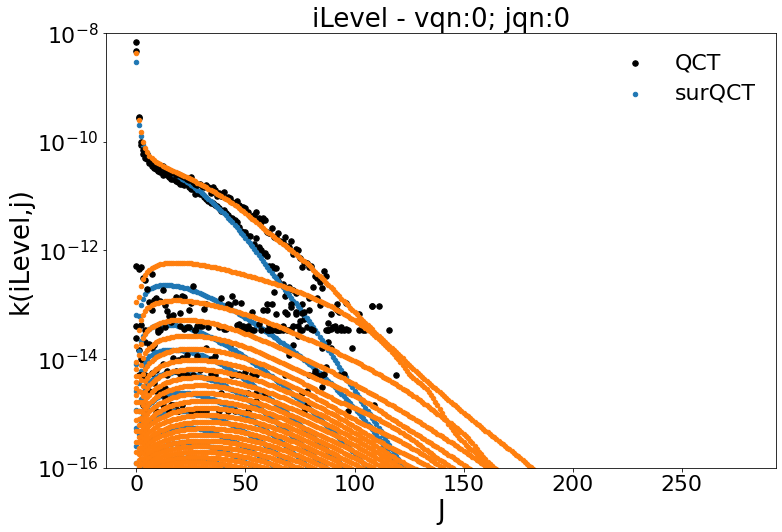

In [20]:
iIdxVec             = np.array([1], dtype=int)
TTranVecNew = [5000.0, 10000.0]
fig = plt.figure(figsize=(12,8))
for TTran in TTranVecNew:
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit = KInelMat
    elif (ExcitType == 'KExch'):
        KExcit = KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    Str = 'q_'+str(int(TTran))
    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        if (InputData.ExoEndoFlg):
            jIdxVec           = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] <= DiatData[0]['EInt'].to_numpy()[iIdx])]
            jIdxVecNo         = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] > DiatData[0]['EInt'].to_numpy()[iIdx])]
            RatioNo           = [DiatData[0][Str].to_numpy()[iIdx]/DiatData[1][Str].to_numpy()[jIdx] for jIdx in np.arange(NLevels[1]) if (DiatData[1]['EInt'].to_numpy()[jIdx] > DiatData[0]['EInt'].to_numpy()[iIdx])]
        else:
            jIdxVec           = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    >= DiatData[0][Str].to_numpy()[iIdx])]
            jIdxVecNo         = [jIdx for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    < DiatData[0][Str].to_numpy()[iIdx])]
            RatioNo           = [DiatData[0][Str].to_numpy()[iIdx]/DiatData[1][Str].to_numpy()[jIdx] for jIdx in np.arange(NLevels[1]) if (DiatData[1][Str].to_numpy()[jIdx]    < DiatData[0][Str].to_numpy()[iIdx])]
        jNLevels              = len(jIdxVec)
        jNLevelsNo            = len(jIdxVecNo)  


        ### FWD Rates
        iiIdxVec              = [iIdx]*jNLevels

        TTranVecTemp          = np.ones((jNLevels))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = jIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = jIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp
        jLevelsDataTemp.index = jIdxVec

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = jIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTemp_FWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_FWD          = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 
            KExcit_NN_FWD1         = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact * ScalingFactor 



        ## BWD Rates
        iiIdxVec              = jIdxVecNo
        jIdxVec               = [iIdx]*jNLevelsNo

        TTranVecTemp          = np.ones((jNLevelsNo))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = iiIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = iiIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy() 
        jLevelsDataTemp.index = iiIdxVec
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = iiIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTempp_BWD            = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTempp_BWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_BWD          = np.exp( NN_KExcit.Model.predict(xTempp_BWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 
            KExcit_NN_BWD[:,0]     = KExcit_NN_BWD[:,0] / RatioNo
            KExcit_NN_BWD1          = np.exp( NN_KExcit.Model.predict(xTempp_BWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact * ScalingFactor
            KExcit_NN_BWD1[:,0]     = KExcit_NN_BWD1[:,0] / RatioNo


            iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
            iLevelsData.columns   = [(VarName + '_j') for VarName in iLevelsData.columns]

            jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
            jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

            kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
            kLevelsData.columns   = [(VarName + '_i') for VarName in kLevelsData.columns]

            xTemp_BWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)



        ### Concatenating
            if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
                xTemp     = pd.concat([xTemp_FWD, xTemp_BWD], axis=0)
                KExcit_NN = np.concatenate((KExcit_NN_FWD, KExcit_NN_BWD), axis=0)
                KExcit_NN1 = np.concatenate((KExcit_NN_FWD1, KExcit_NN_BWD1), axis=0)
            else:
                xTemp     = xTemp_BWD
                KExcit_NN = KExcit_NN_BWD
                KExcit_NN1 = KExcit_NN_BWD1
        else:
            if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
                xTemp     = xTemp_FWD
                KExcit_NN = KExcit_NN_FWD
                KExcit_NN1 = KExcit_NN_FWD1


        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        if (CPlotFlf):

            vmax     = -8
            vmin     = -14

            cdict = {
              'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
              'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
              'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
            }

            fig, axs = plt.subplots(1,2,figsize=(15,15))

            axs[0].scatter(DiatData[1]['vqn'][Mask], DiatData[1]['jqn'][Mask], c=np.log10(KExcit[iIdx,Mask]), vmin=vmin, vmax=vmax)
            axs[0].set_xlim([DiatData[1]['vqn'].min(), DiatData[1]['vqn'].max()])
            axs[0].set_ylim([DiatData[1]['jqn'].min(), DiatData[1]['jqn'].max()])

            axs[1].scatter(xTemp['vqn_j'], xTemp['jqn_j'], c=np.log10(KExcit_NN[:,0]), vmin=vmin, vmax=vmax)
            axs[1].set_xlim([DiatData[1]['vqn'].min(), DiatData[1]['vqn'].max()])
            axs[1].set_ylim([DiatData[1]['jqn'].min(), DiatData[1]['jqn'].max()])

            ax=plt.gca()
            PCM=ax.get_children()[2] #get the mappable, the 1st and the 2nd are the x and y axes
            #plt.colorbar(PCM, ax=ax) 

        else:

            j_color = xTemp['jqn_j'] % 2
            v_color = xTemp['vqn_j'] == 0
            cmap=mpl.colors.ListedColormap(["navy","crimson","limegreen","gold","k","r","b","y","c"])
            cmap1=mpl.colors.ListedColormap(["r","limegreen"])

            label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
            plt.scatter(DiatData[1]['jqn'][Mask], KExcit[iIdx,Mask], c='k', s=30,label='QCT')
            #plt.scatter(xTemp['jqn_j'], KExcit_NN[:,0], s=20, c='r', label='surQCT')
            #plt.scatter(xTemp['jqn_j'], KExcit_NN[:,0], s=20, c='r', label='surQCT')
            plt.scatter(xTemp['jqn_j'], KExcit_NN1[:,0], s=20, label='surQCT')
            plt.yscale('log')
            plt.legend(['QCT','surQCT'],frameon=False)
            plt.ylim([1.e-16, 1.e-8])
            plt.xlabel('J')
            plt.ylabel('k(iLevel,j)')
            plt.title(label_plot)

# Single Transition Plots Temperature Variation with QCT

[SurQCT]:   Reading Variables:  ['ri', 'VMax', 'log_rorMin', 'log_EVib', 'jqn', 'vqn', 'log_ERot']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/O2_UMN_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/O2_UMN_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 1500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 2500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 18.54it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 6000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 8000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 12000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 14000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 15000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 20000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Level: 0; vqn: 0; jqn:0

[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...
[SurQCT]:   Reading Variables:  ['ri', 'VMax', 'log_rorMin', 'log_EVib', 'jqn', 'vqn', 'log_ERot']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 2500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 7500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 12500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 15000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 19.29it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 20000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]


Level: 0; vqn: 0; jqn:0

[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...
[SurQCT]:   Reading Variables:  ['ri', 'VMax', 'log_rorMin', 'log_EVib', 'jqn', 'vqn', 'log_ERot']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5 for Excitation Rates at Temperature 20000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]


Level: 0; vqn: 0; jqn:0


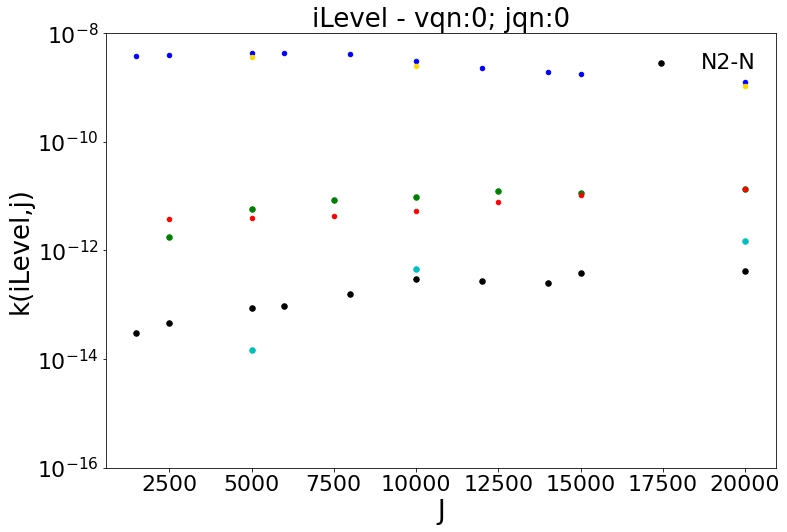

In [12]:
iIdxVec             = np.array([1], dtype=int)
jIdxVec             = np.array([34], dtype=int)
fig = plt.figure(figsize=(12,8))
TTranVec            = [1500.0, 2500.0, 5000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 15000.0, 20000.0]

InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)

LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)
    
for TTran in TTranVec:
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit = KInelMat
    elif (ExcitType == 'KExch'):
        KExcit = KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    Str = 'q_'+str(int(TTran))
    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdxVec)

        ### Rates
        iiIdxVec              = [iIdx]*jNLevels

        TTranVecTemp          = np.ones((jNLevels))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = jIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = jIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp
        jLevelsDataTemp.index = jIdxVec

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = jIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTemp_FWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_FWD          = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
        plt.scatter(TTran, KExcit[iIdx,jIdxVec], c='k', s=30,label='QCT')
        plt.scatter(TTran, KExcit_NN_FWD, s=20,  c='b')
        plt.yscale('log')
        plt.legend(['O3'],frameon=False)
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)

            
#================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For CO from COO PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/CO2_NASA.hdf5'
InputData.Molecules       = ['CO','CO'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat',
                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat']
ScalingFactor = 1.0

#===============================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#==============================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)

iIdxVec             = np.array([1], dtype=int)
jIdxVec             = np.array([34], dtype=int)
TTranVec            = [2500.0, 5000.0, 7500.0, 10000.0, 12500.0, 15000.0, 20000.0]


for TTran in TTranVec:
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit = KInelMat
    elif (ExcitType == 'KExch'):
        KExcit = KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    Str = 'q_'+str(int(TTran))
    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdxVec)

        ### Rates
        iiIdxVec              = [iIdx]*jNLevels

        TTranVecTemp          = np.ones((jNLevels))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = jIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = jIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp
        jLevelsDataTemp.index = jIdxVec

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = jIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTemp_FWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_FWD          = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
        plt.scatter(TTran, KExcit[iIdx,jIdxVec], c='g', s=30,label='QCT')
        plt.scatter(TTran, KExcit_NN_FWD, s=20,  c='r')
        plt.yscale('log')
        plt.legend(['CO-O'],frameon=False)
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)
            
#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For N2 from N3 PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5'
InputData.Molecules       = ['N2','N2'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp',
                            InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp']   

ScalingFactor = 1.0

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)


iIdxVec             = np.array([1], dtype=int)
jIdxVec             = np.array([35], dtype=int)
TTranVec            = [5000.0, 10000.0, 20000.0]

for TTran in TTranVec:
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit = KInelMat
    elif (ExcitType == 'KExch'):
        KExcit = KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    Str = 'q_'+str(int(TTran))
    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdxVec)

        ### Rates
        iiIdxVec              = [iIdx]*jNLevels

        TTranVecTemp          = np.ones((jNLevels))*TTran
        TTranDataTemp         = pd.DataFrame({'TTran': TTranVecTemp})
        TTranDataTemp.index   = jIdxVec


        iLevelsDataTemp       = LevelsData[0].iloc[iiIdxVec,:].copy()
        iLevelsDataTemp.index = jIdxVec

        jLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        if (OtherVar == '_Delta'):
            jLevelsDataTemp   = iLevelsDataTemp.subtract(jLevelsDataTemp) 
        else:
            jLevelsDataTemp   = jLevelsDataTemp
        jLevelsDataTemp.index = jIdxVec

        kLevelsDataTemp       = LevelsData[1].iloc[jIdxVec,:].copy()        
        kLevelsDataTemp.index = jIdxVec


        iLevelsData           = pd.concat([iLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        iLevelsData.columns   = [(VarName + '_i') for VarName in iLevelsData.columns]

        jLevelsData           = pd.concat([jLevelsDataTemp[xVarsVec_Delta], TTranDataTemp], axis=1)
        jLevelsData.columns   = [(VarName + OtherVar) for VarName in jLevelsData.columns]

        kLevelsData           = pd.concat([kLevelsDataTemp[xVarsVec_i], TTranDataTemp], axis=1)
        kLevelsData.columns   = [(VarName + '_j') for VarName in kLevelsData.columns]

        xTemp_FWD             = pd.concat([iLevelsData, jLevelsData, kLevelsData], axis=1)

        if (len(xTemp_FWD[NN_KExcit.xTrainingVar]) > 0):
            KExcit_NN_FWD          = np.exp( NN_KExcit.Model.predict(xTemp_FWD[NN_KExcit.xTrainingVar]) ) / InputData.MultFact 

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
        plt.scatter(TTran, KExcit[iIdx,jIdxVec], c='c', s=30,label='QCT')
        plt.scatter(TTran, KExcit_NN_FWD, s=20,  c='gold')
        plt.yscale('log')
        plt.legend(['N2-N'],frameon=False)
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)

# Single Rates Temperature Variation all molecules

[SurQCT]:   Reading Variables:  ['ri', 'vqn', 'log_rorMin', 'log_EVib', 'jqn', 'log_ERot']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/O2_UMN_log_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/O2_UMN_log_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 1500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 28.03it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 2500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 44.72it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 36.20it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 6000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 41.40it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 8000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 43.19it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 44.23it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 12000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 43.75it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 14000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 43.71it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 15000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 42.60it/s]


Level: 0; vqn: 0; jqn:0
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 20000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 43.92it/s]


Level: 0; vqn: 0; jqn:0


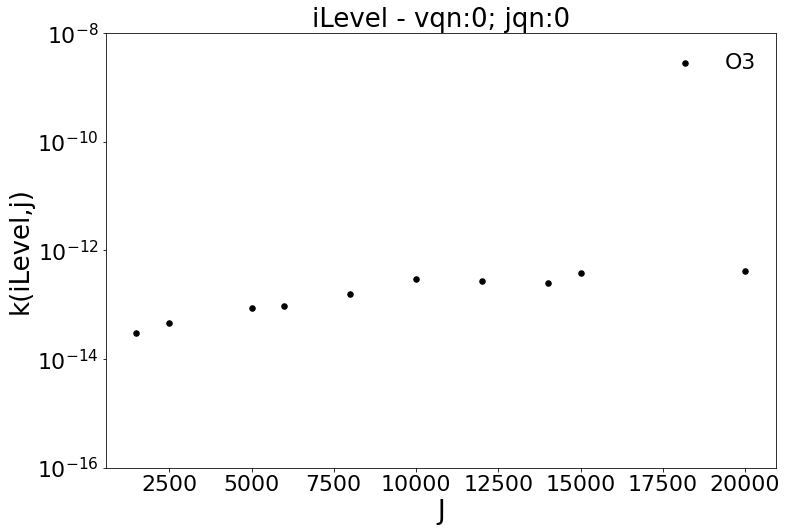

In [20]:
iIdxVec             = np.array([1], dtype=int)
jIdxVec             = np.array([34], dtype=int)
fig = plt.figure(figsize=(12,8))
TTranVec            = [1500.0, 2500.0, 5000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 15000.0, 20000.0]

InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)

LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)

KExcitO2=[]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcitO2.append(KInelMat)
    elif (ExcitType == 'KExch'):
        KExcitO2.append(KExchMatList[0])
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdxVec)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
        plt.scatter(TTran, KExcit[iIdx,jIdxVec], c='k', s=30,label='QCT')
        plt.yscale('log')
        plt.legend(['O3'],frameon=False)
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)

            
#================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For CO from COO PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/CO2_NASA.hdf5'
InputData.Molecules       = ['CO','CO'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat',
                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat']
ScalingFactor = 1.0

#===============================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#==============================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)

iIdxVec             = np.array([1], dtype=int)
jIdxVec             = np.array([34], dtype=int)
TTranVec            = [2500.0, 5000.0, 7500.0, 10000.0, 12500.0, 15000.0, 20000.0]

KExcitCO=[]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcitCO.append(KInelMat)
    elif (ExcitType == 'KExch'):
        KExcitCO.append(KExchMatList[0])
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdxVec)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
        plt.scatter(TTran, KExcitCO[iTTran][iIdx,jIdxVec], c='g', s=30,label='QCT')
        plt.yscale('log')
        plt.legend(['COO'],frameon=False)
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)

#================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For CO from COO PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/O2C_NASA.hdf5'
InputData.Molecules       = ['O2','O2'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/O2_NASA_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/O2_NASA_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/O2/NASA/O2_levels_venturi_new.dat',
                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/O2/NASA/O2_levels_venturi_new.dat']
ScalingFactor = 1.0

#===============================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#==============================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)

iIdxVec             = np.array([1], dtype=int)
jIdxVec             = np.array([34], dtype=int)
TTranVec            = [2500.0, 5000.0, 7500.0, 10000.0, 12500.0, 15000.0, 20000.0]

KExcitO2=[]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcitO2.append(KInelMat)
    elif (ExcitType == 'KExch'):
        KExcitO2.append(KExchMatList[0])
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdxVec)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
        plt.scatter(TTran, KExcitO2[iTTran][iIdx,jIdxVec], c='g', s=30,label='QCT')
        plt.yscale('log')
        plt.legend(['O2C'],frameon=False)
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)
        
#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For N2 from N3 PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5'
InputData.Molecules       = ['N2','N2'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp',
                            InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp']   

ScalingFactor = 1.0

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)


iIdxVec             = np.array([1], dtype=int)
jIdxVec             = np.array([35], dtype=int)
TTranVec            = [5000.0, 10000.0, 20000.0]

KExcitN2=[]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcitN2.append(KInelMat)
    elif (ExcitType == 'KExch'):
        KExcitN2.append(KExchMatList[0])
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdxVec)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
        plt.scatter(TTran, KExcitN2[iTTran][iIdx,jIdxVec], c='b', s=30,label='QCT')
        plt.yscale('log')
        plt.legend(['N3'],frameon=False)
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)
        
#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# For NO 
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/NON_UMN.hdf5'
InputData.Molecules       = ['NO','NO'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/NO_UMN_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/NO_UMN_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/NO/UMN/Recomputed.inp',
                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/NO/UMN/Recomputed.inp'] 
ScalingFactor = 1.0 #9.545/10.667

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)


iIdxVec             = np.array([1], dtype=int)
jIdxVec             = np.array([35], dtype=int)
TTranVec            = [2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0]

KExcitNO=[]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcitNO.append(KInelMat)
    elif (ExcitType == 'KExch'):
        KExcitNO.append(KExchMatList[0])
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdxVec)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
        plt.scatter(TTran, KExcitNO[iTTran][iIdx,jIdxVec], c='r', s=30,label='QCT')
        plt.yscale('log')
        plt.legend(['NOO'],frameon=False)
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)

#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/N2O_UMN.hdf5'
InputData.Molecules       = ['N2','N2'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_UMN_ForN2O2_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_UMN_ForN2O2_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/UMN_ForN2O2/Recomputed.inp',
                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/UMN_ForN2O2/Recomputed.inp'] 

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)


iIdxVec             = np.array([1], dtype=int)
jIdxVec             = np.array([35], dtype=int)
TTranVec            = [2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0]

KExcitN2_N2O=[]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcitN2_N2O.append(KInelMat)
    elif (ExcitType == 'KExch'):
        KExcitN2_N2O.append(KExchMatList[0])
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdxVec, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdxVec)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        label_plot = "iLevel - vqn:" + str(DiatData[0]['vqn'].to_numpy()[iIdx])+"; jqn:"+str(DiatData[0]['jqn'].to_numpy()[iIdx])
        plt.scatter(TTran, KExcitNO[iTTran][iIdx,jIdxVec], c='r', s=30,label='QCT')
        plt.yscale('log')
        plt.legend(['NOO'],frameon=False)
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('T [K]')
        plt.ylabel('k($_{i,j}$')
        plt.title(label_plot)

[SurQCT]:   Reading Variables:  ['jqn', 'vqn', 'log_rorMin', 'log_ERot', 'ri', 'log_EVib']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/O2_UMN_log_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/O2_UMN_log_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 1500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 28.74it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 2500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 45.47it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 45.11it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 6000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 41.20it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 8000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 44.33it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 40.04it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 12000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 41.25it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 14000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 45.13it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 15000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 44.07it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O3_UMN.hdf5 for Excitation Rates at Temperature 20000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 43.64it/s]


Level: 14; vqn: 0; jqn:14

[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...
[SurQCT]:   Reading Variables:  ['jqn', 'vqn', 'log_rorMin', 'log_ERot', 'ri', 'log_EVib']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 2500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 33.57it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 42.98it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 7500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 43.98it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 35.27it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 12500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 44.19it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 15000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 42.86it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/CO2_NASA.hdf5 for Excitation Rates at Temperature 20000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 43.44it/s]


Level: 14; vqn: 0; jqn:14

[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...
[SurQCT]:   Reading Variables:  ['jqn', 'vqn', 'log_rorMin', 'log_ERot', 'ri', 'log_EVib']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/O2_NASA_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/O2/NASA/O2_levels_venturi_new.dat
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/O2_NASA_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/O2/NASA/O2_levels_venturi_new.dat
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O2C_NASA.hdf5 for Excitation Rates at Temperature 2500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 38.98it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O2C_NASA.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 45.70it/s]
[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O2C_NASA.hdf5 for Excitation Rates at Temperature 7500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 43.68it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O2C_NASA.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 45.28it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O2C_NASA.hdf5 for Excitation Rates at Temperature 12500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 45.02it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O2C_NASA.hdf5 for Excitation Rates at Temperature 15000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 44.03it/s]
[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/O2C_NASA.hdf5 for Excitation Rates at Temperature 20000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 38.72it/s]


Level: 14; vqn: 0; jqn:14

[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...
[SurQCT]:   Reading Variables:  ['jqn', 'vqn', 'log_rorMin', 'log_ERot', 'ri', 'log_EVib']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 45.07it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 43.16it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5 for Excitation Rates at Temperature 20000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 45.36it/s]


Level: 14; vqn: 0; jqn:14

[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...
[SurQCT]:   Reading Variables:  ['jqn', 'vqn', 'log_rorMin', 'log_ERot', 'ri', 'log_EVib']
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/NO_UMN_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/NO/UMN/Recomputed.inp
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//Air_Database/Run_0D/database/levels/NO_UMN_Bottom_Vib_we_nd.csv
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/NO/UMN/Recomputed.inp
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/NON_UMN.hdf5 for Excitation Rates at Temperature 2500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 42.16it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/NON_UMN.hdf5 for Excitation Rates at Temperature 5000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 42.75it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/NON_UMN.hdf5 for Excitation Rates at Temperature 7500K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 42.70it/s]
[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes:   0%|          | 0/1 [00:00<?, ?it/s]

Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/NON_UMN.hdf5 for Excitation Rates at Temperature 10000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 43.70it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/NON_UMN.hdf5 for Excitation Rates at Temperature 15000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 38.18it/s]


Level: 14; vqn: 0; jqn:14
[SurQCT]:       Reading HDF5 File from: /home/venturi/WORKSPACE//Air_Database/HDF5_Database/NON_UMN.hdf5 for Excitation Rates at Temperature 20000K


[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes: 100%|██████████| 1/1 [00:00<00:00, 45.05it/s]


Level: 14; vqn: 0; jqn:14


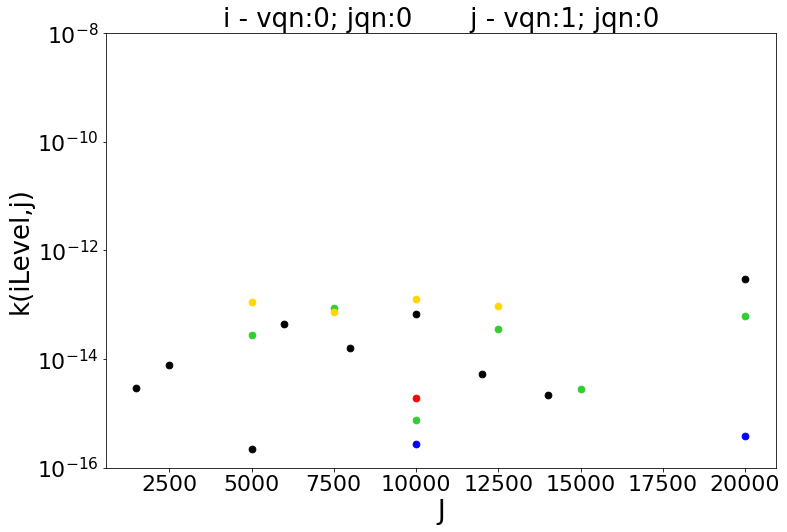

In [22]:
ivqn = 0
ijqn = 15

jvqn = 2
jjqn = 2

fig = plt.figure(figsize=(12,8))
TTranVec            = [1500.0, 2500.0, 5000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 15000.0, 20000.0]

InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)

LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)


iIdx_initial = [ii for ii in range(NLevels[0]) if (DiatData[0]['vqn'].to_numpy()[ii]==ivqn and DiatData[0]['jqn'].to_numpy()[ii]==ijqn)]
jIdx_final = [jj for jj in range(NLevels[0]) if (DiatData[0]['vqn'].to_numpy()[jj]==jvqn and DiatData[0]['jqn'].to_numpy()[jj]==jjqn)]

KExcitO2=[]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit=KInelMat
    elif (ExcitType == 'KExch'):
        KExcit=KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdx_initial, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdx_final)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        plt.scatter(TTran, KExcit[iIdx,jIdx_final], c='k', s=45,label='O3')
        plt.yscale('log')
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)

            
#================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For CO from COO PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/CO2_NASA.hdf5'
InputData.Molecules       = ['CO','CO'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/CO_NASA_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat',
                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/CO/NASA/CO_levels_NASA.dat']
ScalingFactor = 1.0

#===============================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#==============================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)

TTranVec            = [2500.0, 5000.0, 7500.0, 10000.0, 12500.0, 15000.0, 20000.0]

KExcitCO=[]

iIdx_initial = [ii for ii in range(NLevels[0]) if (DiatData[0]['vqn'].to_numpy()[ii]==ivqn and DiatData[0]['jqn'].to_numpy()[ii]==ijqn)]
jIdx_final = [jj for jj in range(NLevels[0]) if (DiatData[0]['vqn'].to_numpy()[jj]==jvqn and DiatData[0]['jqn'].to_numpy()[jj]==jjqn)]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit=KInelMat
    elif (ExcitType == 'KExch'):
        KExcit=KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdx_initial, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdx_final)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        plt.scatter(TTran, KExcit[iIdx,jIdx_final], c='limegreen', s=45,label='COO')
        plt.yscale('log')
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)

#================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For CO from COO PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/O2C_NASA.hdf5'
InputData.Molecules       = ['O2','O2'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/O2_NASA_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/O2_NASA_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/O2/NASA/O2_levels_venturi_new.dat',
                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/O2/NASA/O2_levels_venturi_new.dat']
ScalingFactor = 1.0

#===============================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#==============================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)

TTranVec            = [2500.0, 5000.0, 7500.0, 10000.0, 12500.0, 15000.0, 20000.0]

KExcitO2=[]

iIdx_initial = [ii for ii in range(NLevels[0]) if (DiatData[0]['vqn'].to_numpy()[ii]==ivqn and DiatData[0]['jqn'].to_numpy()[ii]==ijqn)]
jIdx_final = [jj for jj in range(NLevels[0]) if (DiatData[0]['vqn'].to_numpy()[jj]==jvqn and DiatData[0]['jqn'].to_numpy()[jj]==jjqn)]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit=KInelMat
    elif (ExcitType == 'KExch'):
        KExcit=KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdx_initial, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdx_final)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        plt.scatter(TTran, KExcit[iIdx,jIdx_final], c='gold', s=45,label='O2C')
        plt.yscale('log')
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)
        
#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# # For N2 from N3 PES
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5'
InputData.Molecules       = ['N2','N2'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/N2_LeRoy_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp',
                            InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp']   

ScalingFactor = 1.0

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)


TTranVec            = [5000.0, 10000.0, 20000.0]

KExcitN2=[]
iIdx_initial = [ii for ii in range(NLevels[0]) if (DiatData[0]['vqn'].to_numpy()[ii]==ivqn and DiatData[0]['jqn'].to_numpy()[ii]==ijqn)]
jIdx_final = [jj for jj in range(NLevels[0]) if (DiatData[0]['vqn'].to_numpy()[jj]==jvqn and DiatData[0]['jqn'].to_numpy()[jj]==jjqn)]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit=KInelMat
    elif (ExcitType == 'KExch'):
        KExcit=KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdx_initial, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdx_final)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        plt.scatter(TTran, KExcit[iIdx,jIdx_final], c='b', s=45,label='N3')
        plt.yscale('log')
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)
        
#===================================================================================================================================
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToFigFld    = InputData.PathToRunFld+'/'+InputData.PathToFigFld
InputData.PathToParamsFld = InputData.PathToRunFld+'/'+InputData.PathToParamsFld
InputData.PathToDataFld   = InputData.PathToRunFld+'/Data/'                                                               
InputData.PathToParamsFld = InputData.PathToRunFld+'/Params/' 

# For NO 
InputData.PathToHDF5File  = InputData.WORKSPACE_PATH  + '/Air_Database/HDF5_Database/NON_UMN.hdf5'
InputData.Molecules       = ['NO','NO'] 
InputData.PathToLevelsFile= [InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/NO_UMN_Bottom_Vib_we_nd.csv',
                             InputData.WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/NO_UMN_Bottom_Vib_we_nd.csv']
InputData.PathToDiatFile  = [InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/NO/UMN/Recomputed.inp',
                             InputData.WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/NO/UMN/Recomputed.inp'] 
ScalingFactor = 1.0 #9.545/10.667

#===================================================================================================================================
OtherVar           = InputData.OtherVar
xVarsVec_i         = InputData.xVarsVec_i + ['vqn','jqn']
#xVarsVec_i         = InputData.xVarsVec_i + ['vqn']
xVarsVec_Delta     = InputData.xVarsVec_Delta
xVarsVec           = list(set(xVarsVec_i) | set(xVarsVec_Delta))
print('[SurQCT]:   Reading Variables: ', xVarsVec)

InputData.MultFact = 1.e+9
MinValueTrain      = 1.e-16 * InputData.MultFact
MinValueTest       = 1.e-16 * InputData.MultFact
NoiseSD            = 1.e-13 * InputData.MultFact

NMolecules         = len(InputData.PathToLevelsFile)

InputData.iLevelsVecTest = list(np.array(InputData.iLevelsVecTest) - 1)


#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
DiatData2  = []
NLevels    = []
for iMol in range(NMolecules):

    LevelsDataTemp = read_levelsdata(InputData.PathToLevelsFile[iMol], xVarsVec, '')
    LevelsData.append(LevelsDataTemp)

    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)
    
    NLevelsTemp    = LevelsDataTemp.shape[0]
    NLevels.append(NLevelsTemp)

TTranVec            = [2500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0]

KExcitNO=[]
iIdx_initial = [ii for ii in range(NLevels[0]) if (DiatData[0]['vqn'].to_numpy()[ii]==ivqn and DiatData[0]['jqn'].to_numpy()[ii]==ijqn)]
jIdx_final = [jj for jj in range(NLevels[0]) if (DiatData[0]['vqn'].to_numpy()[jj]==jvqn and DiatData[0]['jqn'].to_numpy()[jj]==jjqn)]
iTTran = -1
for TTran in TTranVec:
    iTTran = iTTran + 1
    KInelMat, KExchMatList = read_kexcitdata(InputData, InputData.PathToHDF5File, TTran, TTran, 3)

    if (ExcitType == 'KInel'):
        KExcit=KInelMat
    elif (ExcitType == 'KExch'):
        KExcit=KExchMatList[0]
    else:
        KExcit = KInelMat + KExchMatList[0]

    for iIdx in tqdm(iIdx_initial, desc='[SurQCT]:     Generating Inelastic and Exchange Rate Matrixes'):
        iIdx -= 1
        print('Level: '+str(iIdx)+'; vqn: '+str(DiatData[0]['vqn'].to_numpy()[iIdx])+'; jqn:'+str(DiatData[0]['jqn'].to_numpy()[iIdx]))
        time.sleep(0.02)

        jNLevels              = len(jIdx_final)

        ### Plotting
        Mask     = KExcit[iIdx,:] > MinRate

        plt.scatter(TTran, KExcit[iIdx,jIdx_final], c='r', s=45,label='NON')
        plt.yscale('log')
        plt.ylim([1.e-16, 1.e-8])
        plt.xlabel('J')
        plt.ylabel('k(iLevel,j)')
        plt.title(label_plot)